#  Potential of Tennis Players: A Predictive Model for Player's Best Rank.
### Group 10: Alan Wu, Emily Berard, Mike Nguyen, Andy Xin

### Introduction
#### Background information:
The ATP (Association of Tennis Professionals) Tour is a worldwide tennis tour for men’s professional tennis organized annually by the ATP since 1990. The tour is divided into several tiers of tournaments, with higher tiers offering more ranking points. The PIF ATP Rankings is a merit-based method used by the ATP to rank players, determine entry qualification, and organize tournament seeding. Points are awarded based on the stage of the tournament reached and the tier. The rankings are updated weekly and rewarded points are dropped 52 weeks after being awarded, with some exceptions.

#### Our research question:
We plan to predict the best ranking of players based on various predictors. What is a player’s predicted best rank?

#### The dataset:
We will be using a data set containing player stats for the top 500 ATP players from 2017-2019. The dataset contains 37 variables, including both quantitative and qualitative values. The variables most relevant to our research question include: 

- **Age**: age of the player
- Country: country of origin
- Plays: playing hand (left-handed or right-handed)
- Current Rank: current rank of player
- Best Rank: player’s highest rank
- Name: player’s name
- Backhand: backhand form (two-Handed or one-Handed)
- Prize Money: overall prize money earned
- Height: player's height
- Favorite Surface: preferred surface for games
- Turned Pro: years to become a pro
- Seasons: number of seasons participated
- Current ELO Rank: player's current ELO rank
- Best ELO Rank: player's best ELO rank
- Peak ELO Rating: player's peak ELO rating
- Last Appearance: date of last appearance
- Titles: earned titles
- GOAT Rank: player’s GOAT ranking
- Best Season: player’s best season
- Weight: player's weight


## Preliminary Exploratory Data Analysis

In [1]:
# Retrieving nessesary packages
library(dplyr)
library(tidyverse)
library(tidymodels)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.5.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modelda

### Methods

1. **Loading Packages**: Initially, loaded R packages `tidyverse`, `dylyr` and `tidymodels` for data manipulation and visualization.

2. **Data Import**: Using `read_csv()` to load the dataset for our analysis.

3. **Data Exploration**: Using `head()` to take a preview and understand the dataset's structure and contents.

4. **Data Cleaning**: The data is cleaned by handling missing values, converting data types, and addressing outliers if present.

5. **Data Splitting**: The dataset is divided into training and testing sets, and working with only the training dataset.

6. **Data Summary**: Summarized the training set to figure out if any variables are not strong enough (have too many NAs) for us to use as predictors.
   
7. **Data Visualization**: Visualized the relationship between different variables and best rank variables to get a deeper understanding of how well each variable predicts a player's best rank.
   
9. **Model Building**: Specifying the dependent and independent variables. Then, start working on the linear regression model by creating the model specification and recipe, and fit our simple linear regression model using workflow.

10. **Model Evaluation**: The model's performance is evaluated using metrics using R-squared, RMSE (Root Mean Squared Error), and by plotting residuals to assess the model's fit.

11. **Interpreting Results**: The coefficients of the model are interpreted to understand the relationships between variables and their impact on the dependent variable. 

12. **Making Predictions**: We will use the test data that we splitted in step 5, using the `predict()` function, to assess how well our model does.


In [2]:
# Reading the data file
url = "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_data = read_csv(url)

# Cleaning the data and getting what we need: Best Rank, 
processed_player_data = player_data |>
                        # Cleaning Age column
                        separate(Age, c("Age", "Birth date"), sep = " ") |>
                        mutate(Age = as.numeric(Age)) |>
                        # Cleaning Current Rank column
                        separate(`Current Rank`, c("CurrentRank", "Current Rank (Other)"), sep = " ") |>
                        mutate(`CurrentRank` = as.numeric(`CurrentRank`)) |>
                        # Cleaning Best Rank column
                        separate(`Best Rank`, c("BestRank", "Best Rank (Date)"), sep = " ") |>
                        mutate(`BestRank` = as.numeric(`BestRank`)) |>
                        # Cleaning Height column
                        separate(`Height`, c("Height(cm)", "cm REMOVE"), sep = " ") |>
                        mutate(`Height(cm)` = as.numeric(`Height(cm)`)) |>
                        # Cleaning Weight column
                        separate(`Weight`, c("Weight(kg)", "kg REMOVE"), sep = " ") |>
                        mutate(`Weight(kg)` = as.numeric(`Weight(kg)`)) |>
                        # Cleaning Current ELO Rank column
                        separate(`Current Elo Rank`, c("CurrentEloRank", "eloRank REMOVE"), sep = " ") |>
                        mutate(`CurrentEloRank` = as.numeric(`CurrentEloRank`)) |>
                        # Cleaning Best ELO Rank column
                        separate(`Best Elo Rank`, c("BestEloRank", "eloBest REMOVE"), sep = " ") |>
                        mutate(`BestEloRank` = as.numeric(`BestEloRank`)) |>
                        # Cleaning Peak ELO Rank column
                        separate(`Peak Elo Rating`, c("PeakEloRating", "eloPeak REMOVE"), sep = " ") |>
                        mutate(`PeakEloRating` = as.numeric(`PeakEloRating`)) |>
                        # Cleaning Turned Pro
                        mutate(`TurnedPro` = `Turned Pro`) |>
                        # Setting Country as categorical
                        mutate(Country = as.factor(Country)) |>
                        # Setting Backhand preference as categorical
                        mutate(Backhand = as.factor(Backhand)) |>
                        # Setting Main hand preference as categorical
                        mutate(Plays = as.factor(Plays)) |>
                        # Selecting all relevant variables 
                        select(Age, Country, Plays, `CurrentRank`, `BestRank`, Backhand, `Height(cm)`, `TurnedPro`, Seasons, Titles, `Weight(kg)`,`CurrentEloRank`,`BestEloRank`,`PeakEloRating`)

head(processed_player_data)
# Splitting the data
set.seed(1000)

player_split = initial_split(processed_player_data, prop = 3/4, strata = `BestRank`)
player_training = training(player_split) 
player_testing = testing(player_split)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Country,Plays,CurrentRank,BestRank,Backhand,Height(cm),TurnedPro,Seasons,Titles,Weight(kg),CurrentEloRank,BestEloRank,PeakEloRating
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,Brazil,Right-handed,378,363,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,United Kingdom,Left-handed,326,316,Two-handed,NA,NA,NA,NA,NA,NA,NA,NA
32,Slovakia,Right-handed,178,44,Two-handed,185,2005,14,NA,NA,144,60,1886
21,"Korea, Republic of",Right-handed,236,130,Two-handed,NA,NA,2,NA,NA,NA,NA,NA
27,Australia,Right-handed,183,17,Two-handed,193,2008,11,4,NA,100,21,2037
22,Poland,Right-handed,31,31,Two-handed,NA,2015,5,1,NA,33,33,1983


In [3]:
# Summary for data
# Our group is planning to predict the best rank varible. Therefore, we want to find out if there are a lot of missing
# data include in the variables that we are trying to analyze.

age_missing_data <- player_training |> count(is.na(`Age`))
country_missing_data <- player_training |> count(is.na(`Country`))
plays_missing_data <- player_training |> count(is.na(`Plays`))
current_rank_missing_data <- player_training |> count(is.na(`CurrentRank`))
best_rank_without_missing_data <- player_training |> count(is.na(`BestRank`))
backhand_rank_missing_data <- player_training |> count(is.na(`Backhand`))
height_rank_missing_data <- player_training |> count(is.na(`Height(cm)`))
turned_pro_missing_data <- player_training |> count(is.na(`TurnedPro`))
seasons_missing_data <- player_training |> count(is.na(`Seasons`))
titles_missing_data <- player_training |> count(is.na(`Titles`))
weight_missing_data <- player_training |> count(is.na(`Weight(kg)`))

na_table1 <- bind_cols(age_missing_data, country_missing_data, plays_missing_data, current_rank_missing_data, 
                    best_rank_without_missing_data, backhand_rank_missing_data)
na_table2 <- bind_cols(height_rank_missing_data, turned_pro_missing_data, seasons_missing_data,
                    titles_missing_data, weight_missing_data)
na_table1
na_table2
# After comparing the data in the table, we find out the `Height (cm)`, `Titles`, and the `Weight (kg)` variables
# have too many NAs. Therefore, these three columns are not strong enough to help us making predictions.

New names:
• `n` -> `n...2`
• `n` -> `n...4`
• `n` -> `n...6`
• `n` -> `n...8`
• `n` -> `n...10`
• `n` -> `n...12`
New names:
• `n` -> `n...2`
• `n` -> `n...4`
• `n` -> `n...6`
• `n` -> `n...8`
• `n` -> `n...10`


is.na(Age),n...2,is.na(Country),n...4,is.na(Plays),n...6,is.na(CurrentRank),n...8,is.na(BestRank),n...10,is.na(Backhand),n...12
<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>
FALSE,372,FALSE,372,FALSE,337,FALSE,368,FALSE,372,FALSE,306
TRUE,1,TRUE,1,TRUE,36,TRUE,5,TRUE,1,TRUE,67


is.na(`Height(cm)`),n...2,is.na(TurnedPro),n...4,is.na(Seasons),n...6,is.na(Titles),n...8,is.na(`Weight(kg)`),n...10
<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>,<lgl>,<int>
FALSE,90,FALSE,187,FALSE,277,FALSE,74,FALSE,15
TRUE,283,TRUE,186,TRUE,96,TRUE,299,TRUE,358


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


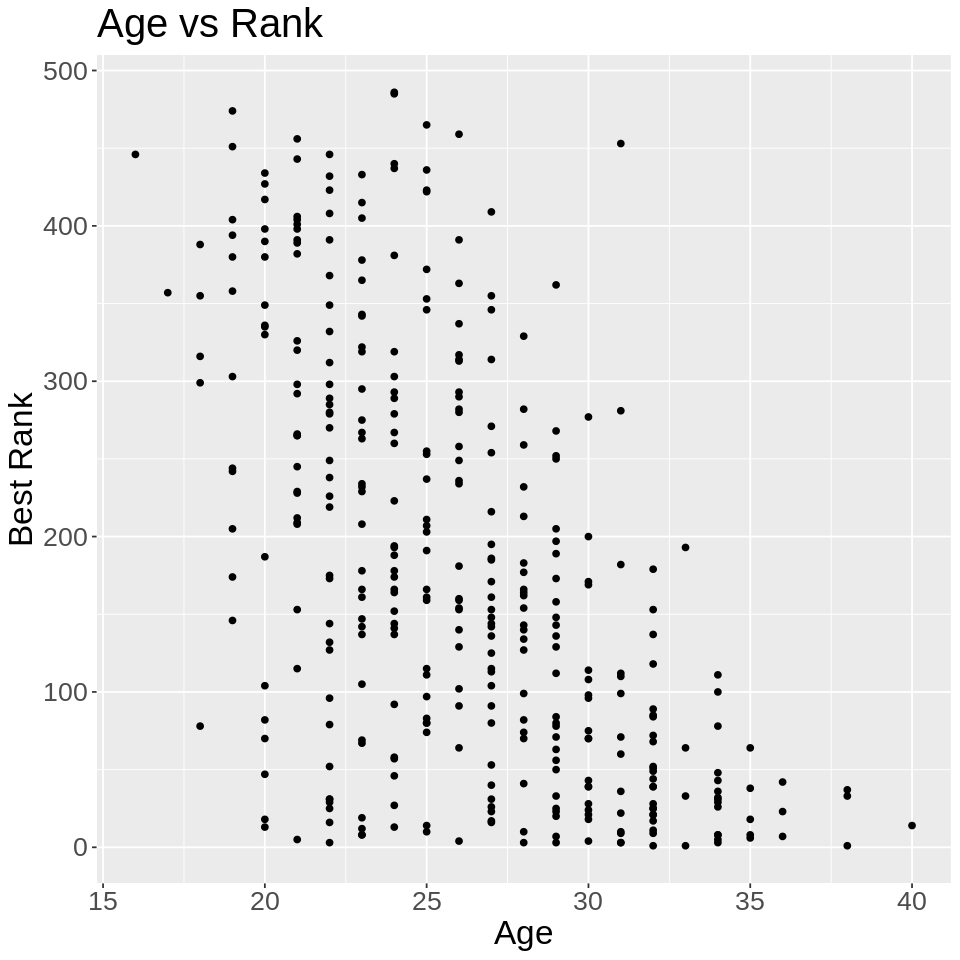

Warning message:
“Removed 283 rows containing missing values or values outside the scale range
(`geom_point()`).”


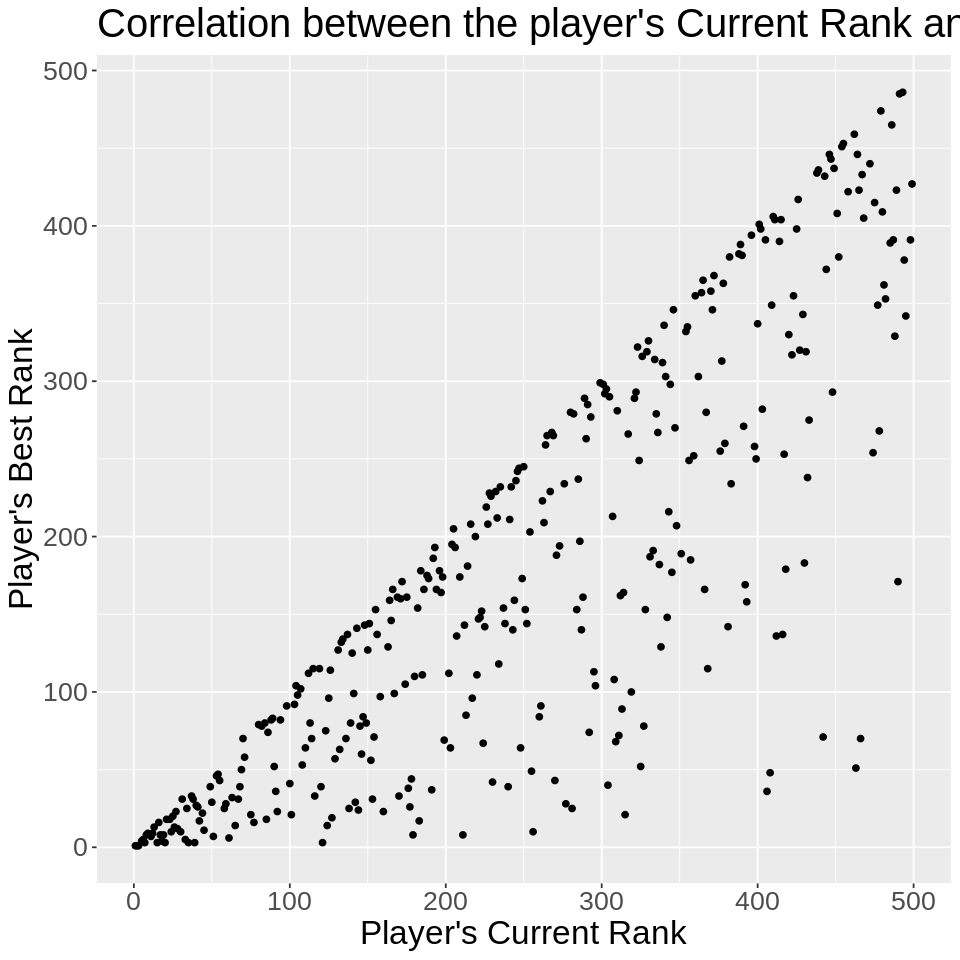

Warning message:
“Removed 186 rows containing missing values or values outside the scale range
(`geom_point()`).”


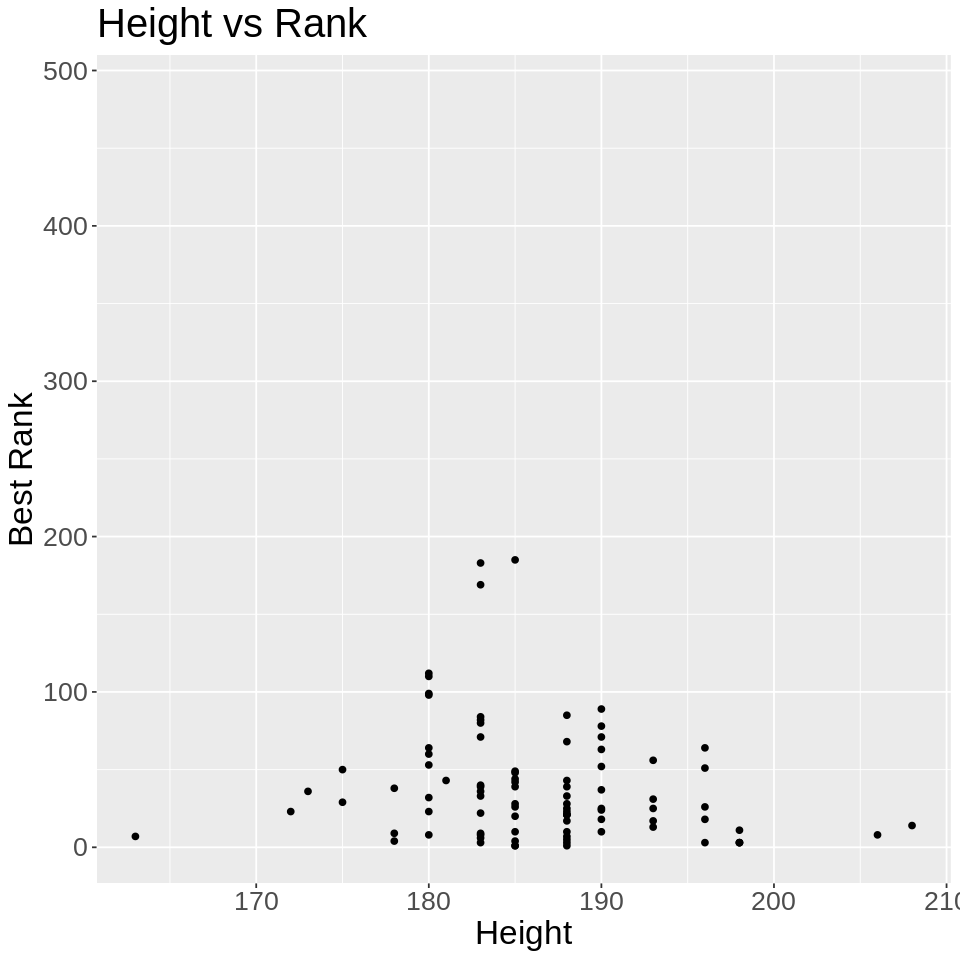

Warning message:
“Removed 186 rows containing missing values or values outside the scale range
(`geom_point()`).”


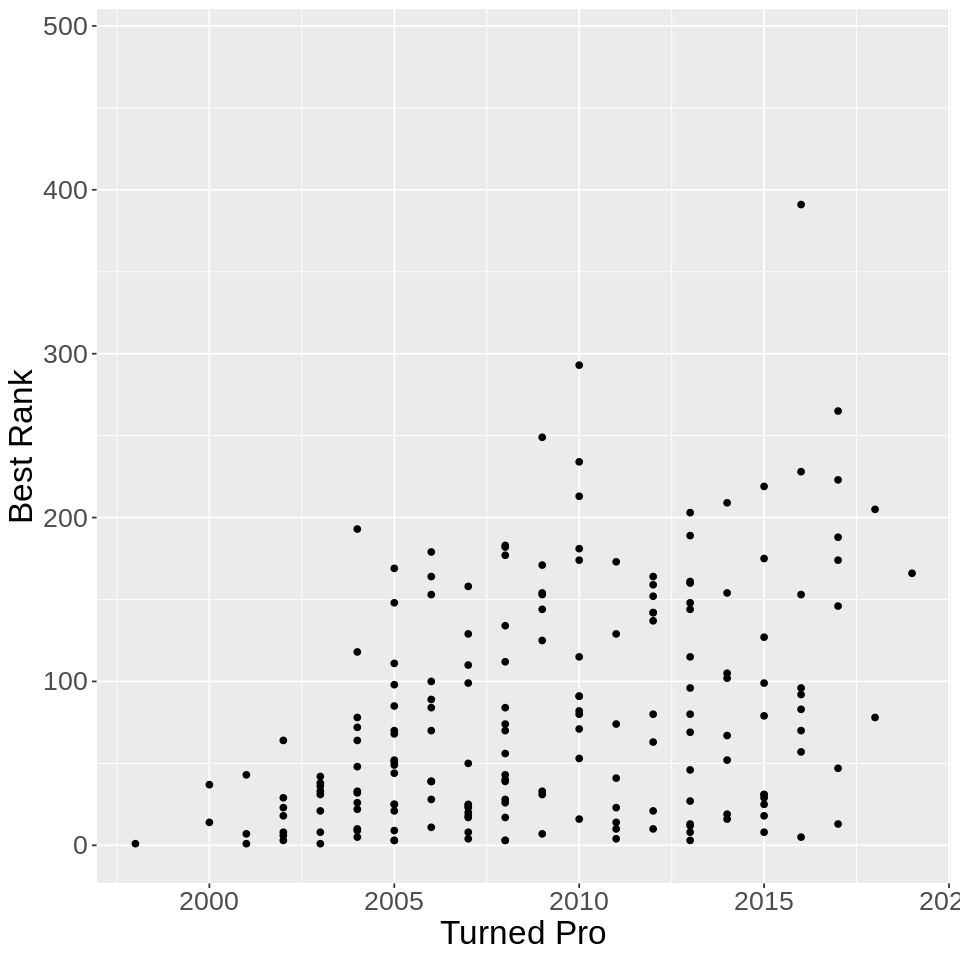

Warning message:
“Removed 96 rows containing missing values or values outside the scale range
(`geom_point()`).”


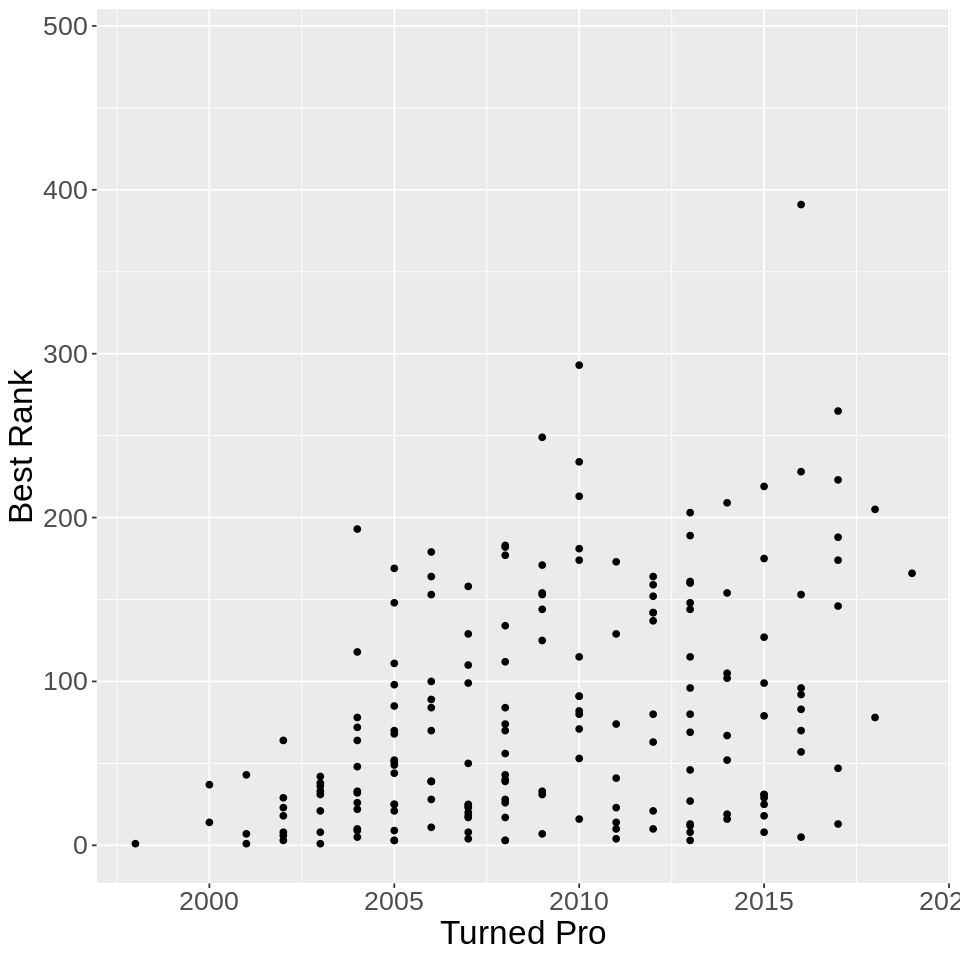

Warning message:
“Removed 299 rows containing missing values or values outside the scale range
(`geom_point()`).”


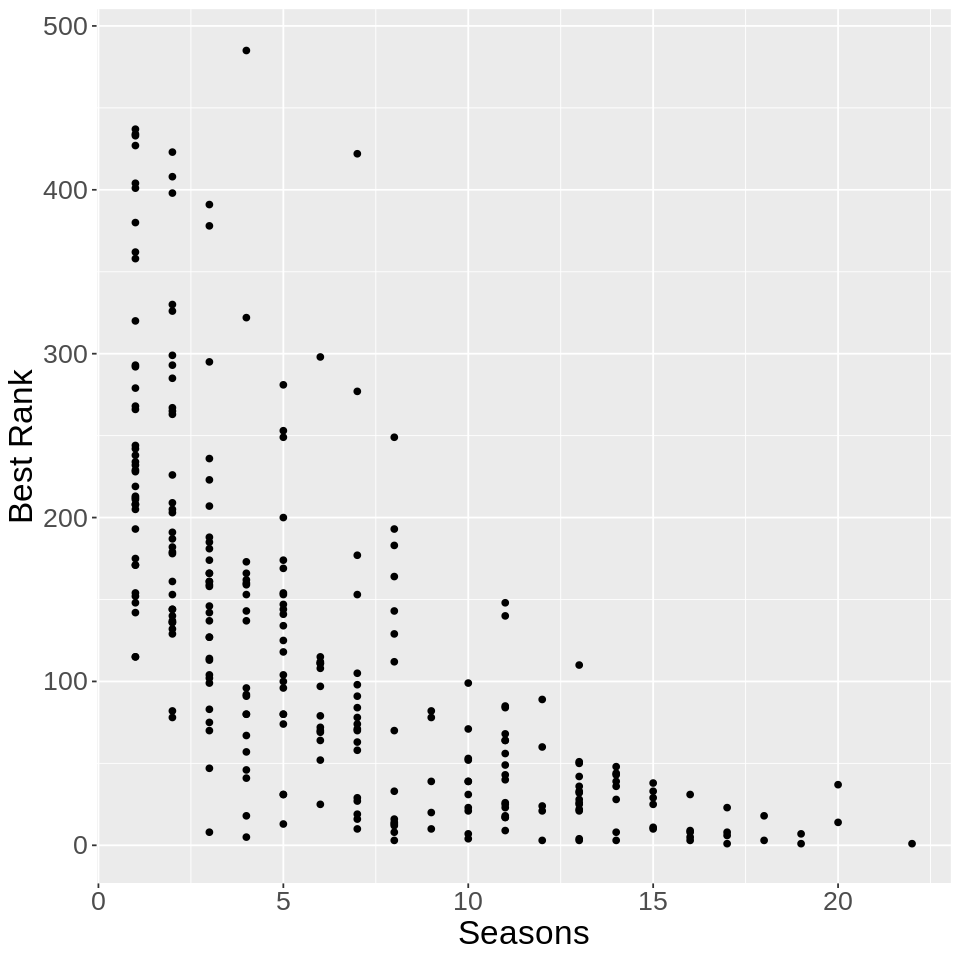

Warning message:
“Removed 358 rows containing missing values or values outside the scale range
(`geom_point()`).”


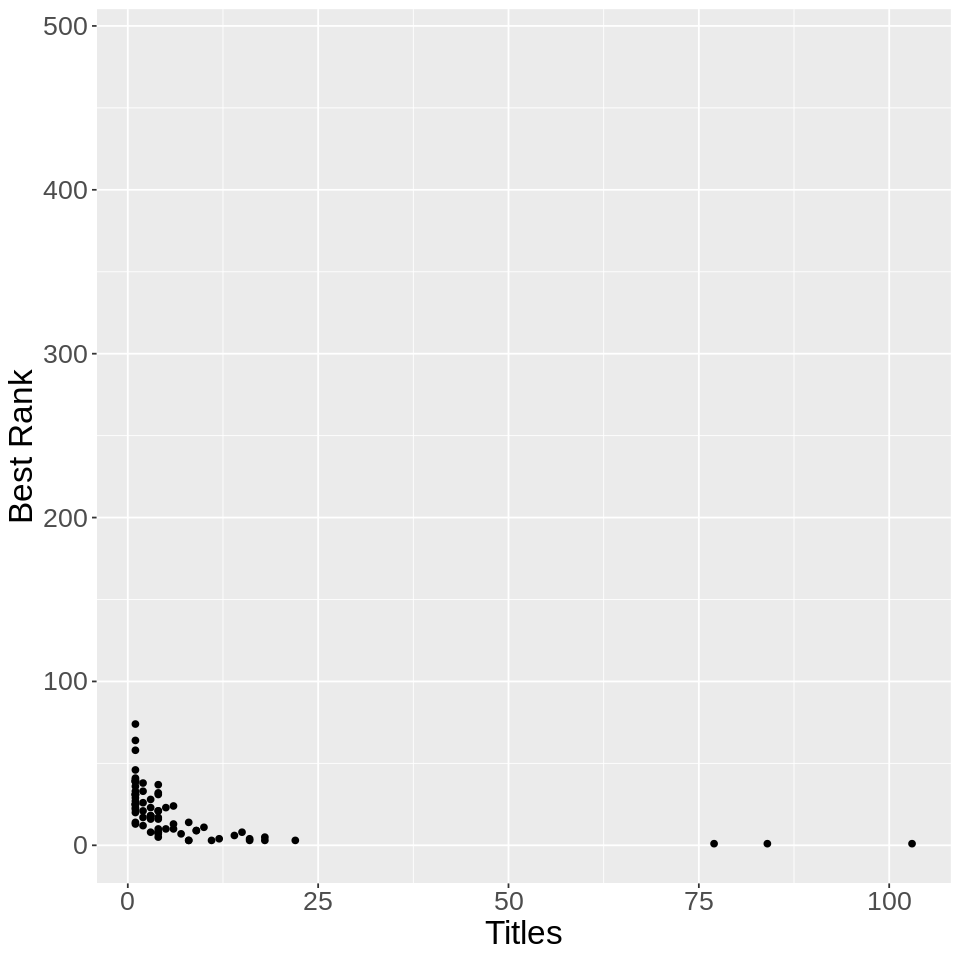

Warning message:
“Removed 240 rows containing missing values or values outside the scale range
(`geom_point()`).”


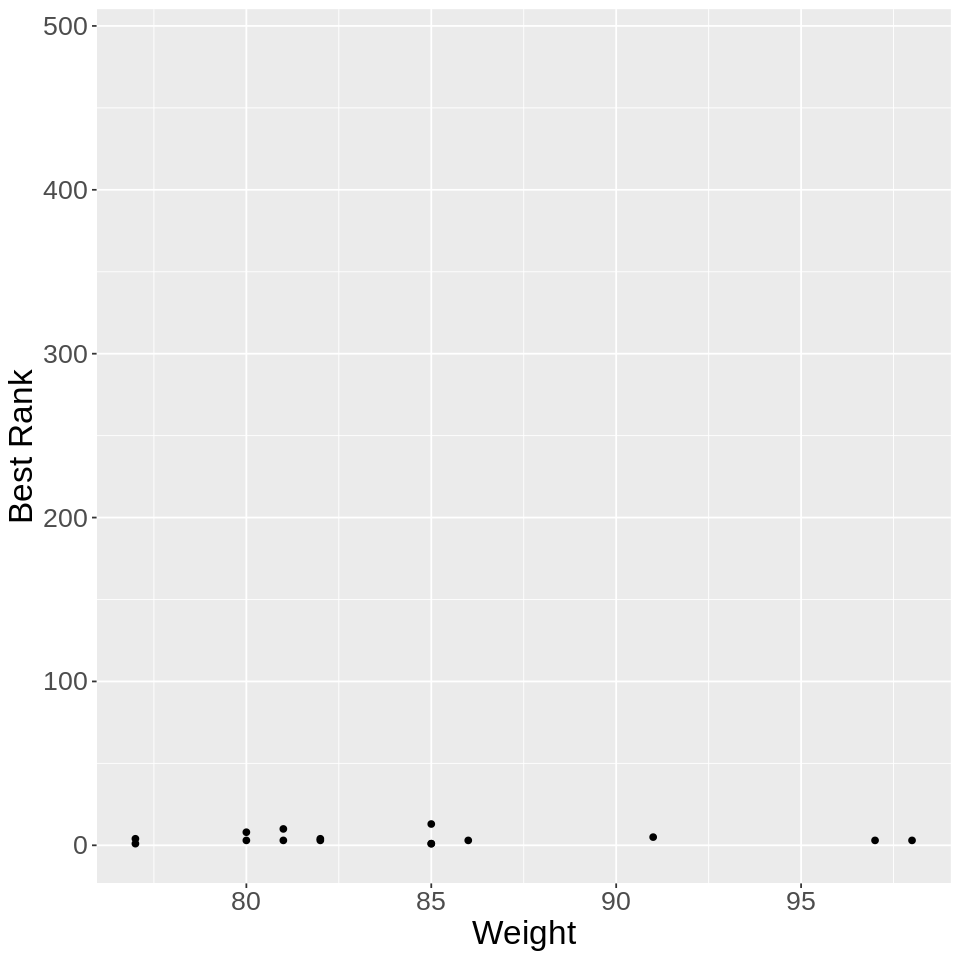

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


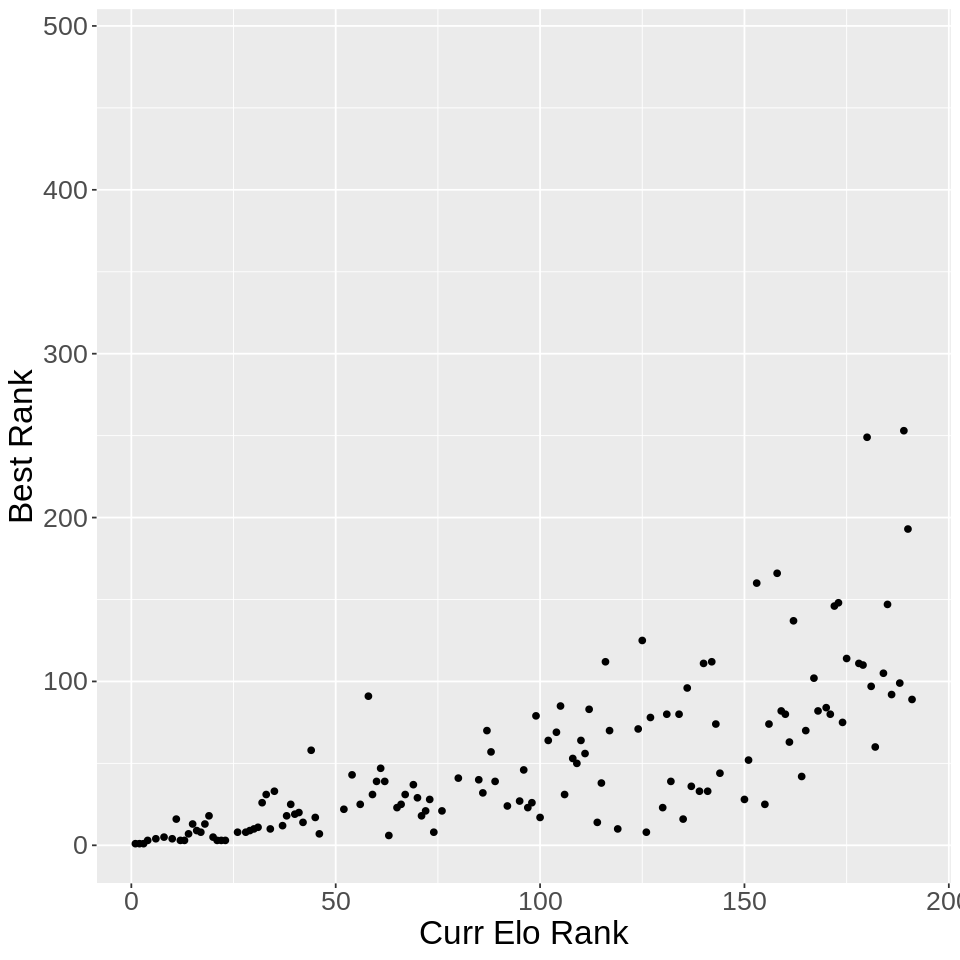

Warning message:
“Removed 199 rows containing missing values or values outside the scale range
(`geom_point()`).”


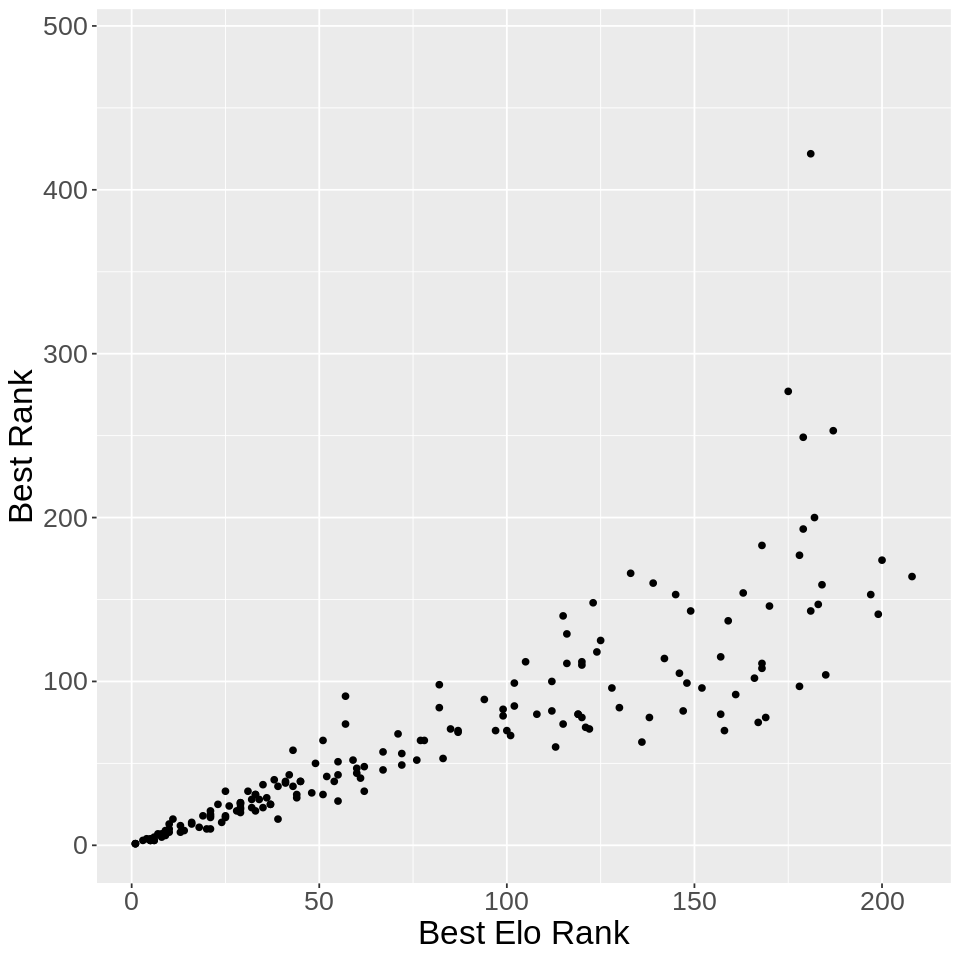

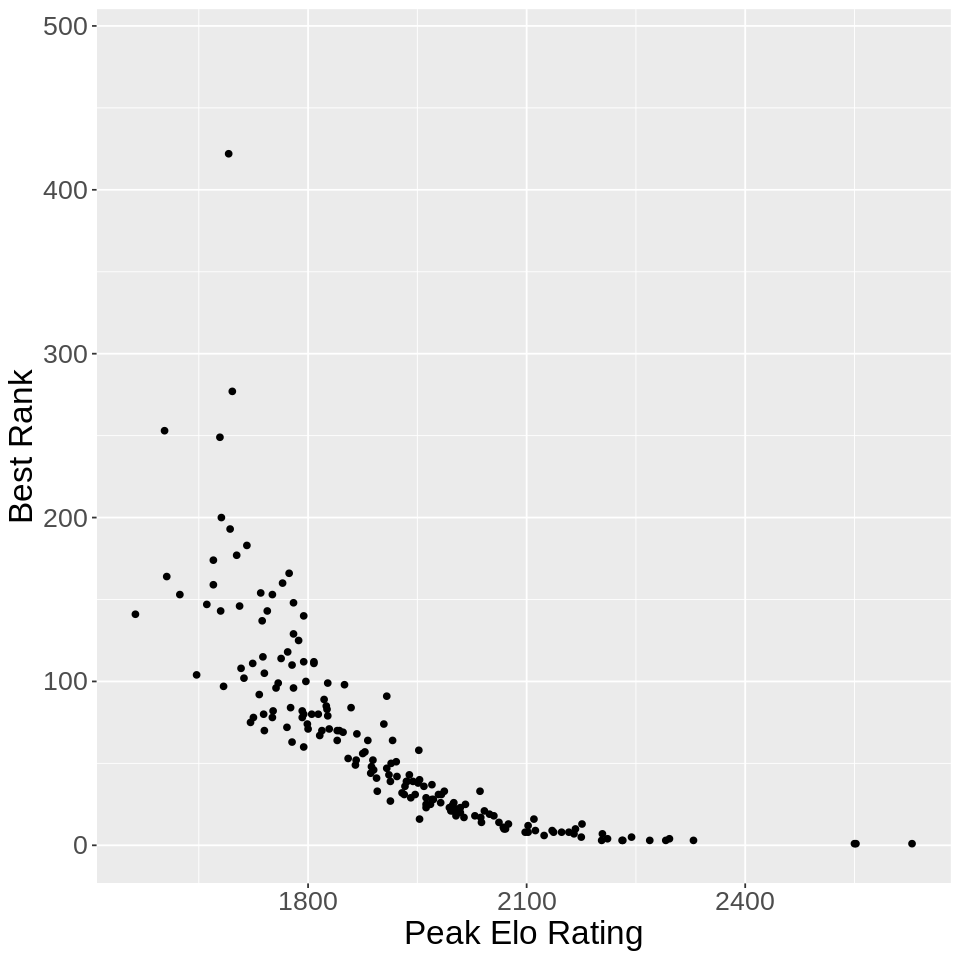

In [9]:
# Visualization for data
options(repr.plot.width= 8, repr.plot.height= 8)

# `BestRank`
# `Age`, `CurrentRank`, `Height(cm)`, `TurnedPro`, `Seasons`, `Titles`, `Weight(kg)`, `CurrentEloRank`, `BestEloRank`, `PeakEloRank`

# 1st Visualization on the correlation between Current Rank and Height
player_plot1 <- player_training |>
            ggplot(aes(x= `Age`,y= `BestRank`)) +
            geom_point() +
            xlab("Age") +
            ylab("Best Rank") +
            ggtitle("Age vs Rank") +
            theme(text = element_text(size=20))

# 2nd Visualization on the correlation between Current Rank and Best Rank
player_plot2 <- player_training |>
            ggplot(aes(x= `CurrentRank`, y= `BestRank`)) +
            geom_point() +
            xlab("Player's Current Rank") +
            ylab("Player's Best Rank") +
            ggtitle("Correlation between the player's Current Rank and Best Rank") +
            theme(text = element_text(size=20))

# 3rd Visualization on the correlation between Age and Current Rank
player_plot3 <- player_training |>
            ggplot(aes(x= `Height(cm)`,y= `BestRank`)) +
            geom_point() +
            xlab("Height") +
            ylab("Best Rank") +
            ggtitle("Height vs Rank") +
            theme(text = element_text(size=20))

player_plot4 <- player_training |>
            ggplot(aes(x= `TurnedPro`,y= `BestRank`)) +
            geom_point() +
            xlab("Turned Pro") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot5 <- player_training |>
            ggplot(aes(x= `TurnedPro`,y= `BestRank`)) +
            geom_point() +
            xlab("Turned Pro") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot6 <- player_training |>
            ggplot(aes(x= `Seasons`,y= `BestRank`)) +
            geom_point() +
            xlab("Seasons") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot7 <- player_training |>
            ggplot(aes(x= `Titles`,y= `BestRank`)) +
            geom_point() +
            xlab("Titles") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot8 <- player_training |>
            ggplot(aes(x= `Weight(kg)`,y= `BestRank`)) +
            geom_point() +
            xlab("Weight") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot9 <- player_training |>
            ggplot(aes(x= `CurrentEloRank`,y= `BestRank`)) +
            geom_point() +
            xlab("Curr Elo Rank") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot10 <- player_training |>
            ggplot(aes(x= `BestEloRank`,y= `BestRank`)) +
            geom_point() +
            xlab("Best Elo Rank") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))

player_plot11 <- player_training |>
            ggplot(aes(x= `PeakEloRating`,y= `BestRank`)) +
            geom_point() +
            xlab("Peak Elo Rating") +
            ylab("Best Rank") +
            theme(text = element_text(size=20))


player_plot1
player_plot2
player_plot3
player_plot4
player_plot5
player_plot6
player_plot7
player_plot8
player_plot9
player_plot10
player_plot11

[1] 123.1025

Warning message:
“Removed 64 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 64 rows containing missing values or values outside the scale range
(`geom_line()`).”


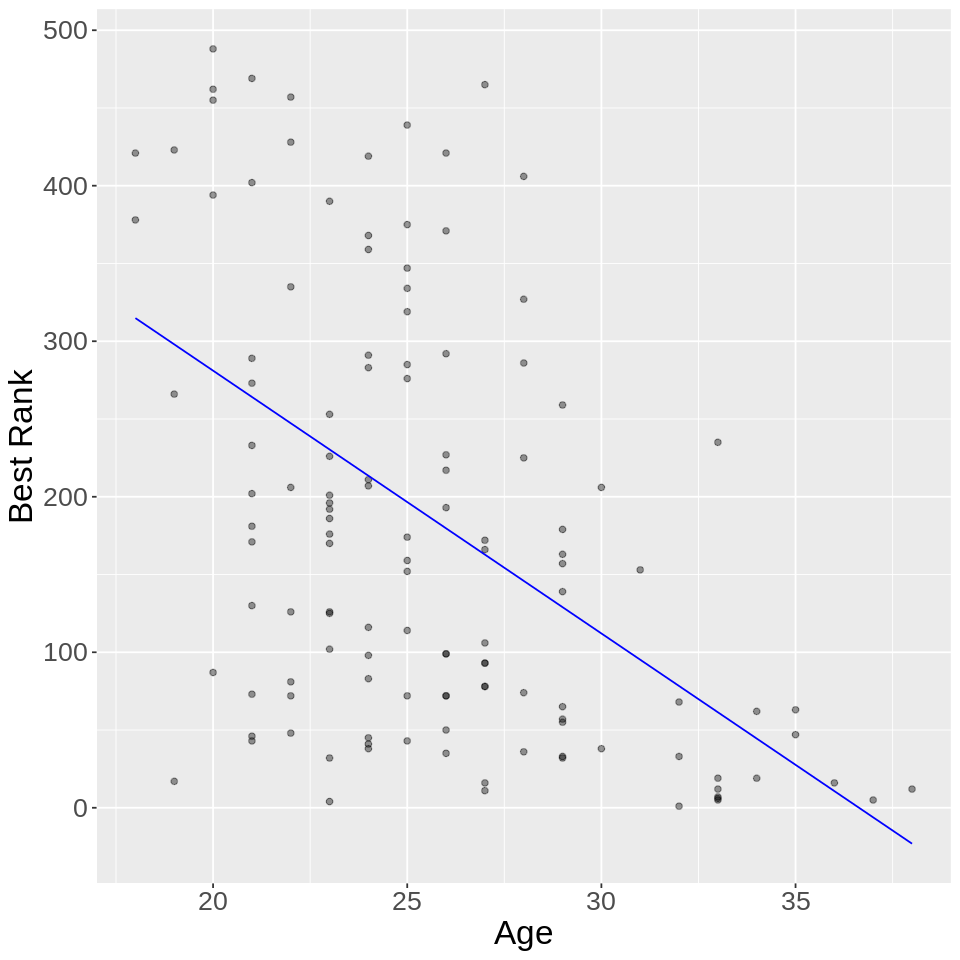

[1] 23.91154

Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_line()`).”


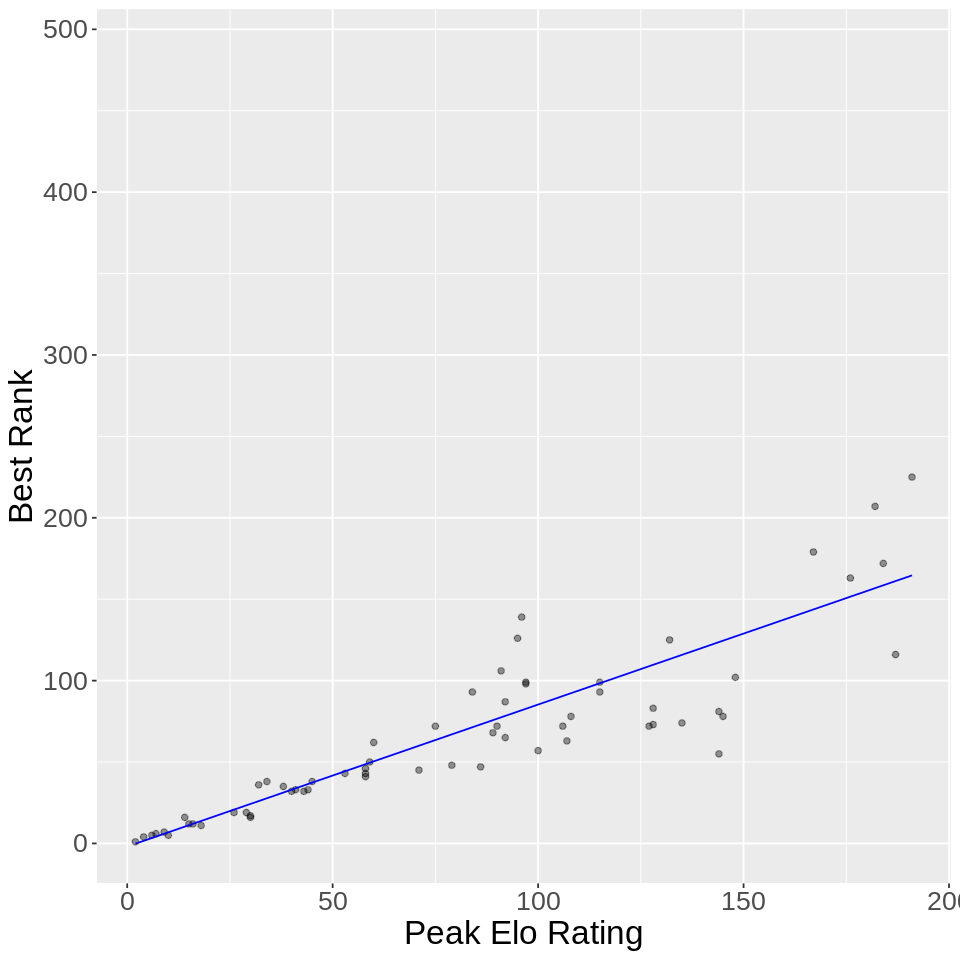

[1] 87.86062

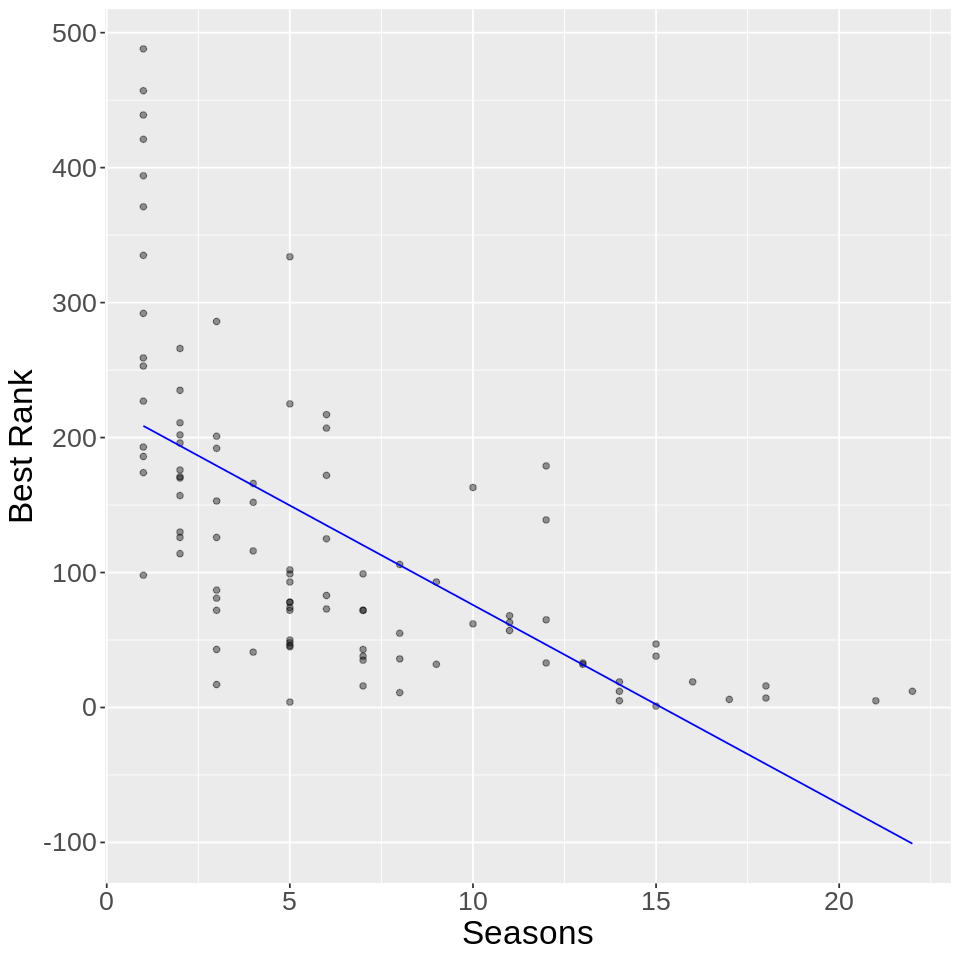

In [10]:
# Data Analysis For Linear Regression Predicting Best Rank with Best Elo Rank and Peak Elo Rating
set.seed(1000)

#player_training 
#player_testing 

# Best Rank predicted with Age
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `Age`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

rating_predictions = lm_fit |>
                     predict(player_testing) |>
                     bind_cols(player_testing)

lm_predictions = rating_predictions |>
                 ggplot(aes(x = `Age`, y = `BestRank`)) +
                 geom_point(alpha = 0.4) +
                 geom_line( mapping = aes(x = `Age`, y = .pred), color = "blue") +
                 xlab("Age") +
                 ylab("Best Rank") +
                 theme(text = element_text(size=20))

lm_predictions

lm_rmspe = lm_fit |>
           predict(player_testing) |>
           bind_cols(player_testing) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmspe



# Best Rank predicted with Best Elo Rank
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `BestEloRank`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

rating_predictions = lm_fit |>
                     predict(player_testing) |>
                     bind_cols(player_testing)

lm_predictions = rating_predictions |>
                 ggplot(aes(x = `BestEloRank`, y = `BestRank`)) +
                 geom_point(alpha = 0.4) +
                 geom_line( mapping = aes(x = `BestEloRank`, y = .pred), color = "blue") +
                 xlab("Peak Elo Rating") +
                 ylab("Best Rank") +
                 theme(text = element_text(size=20))

lm_predictions

lm_rmspe = lm_fit |>
           predict(player_testing) |>
           bind_cols(player_testing) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmspe



# Best Rank predicted with Seasons
lm_spec = linear_reg(mode = "regression", engine = "lm")
player_recipe = recipe(`BestRank` ~ `Seasons`, data=player_training)

lm_fit = workflow() |>
         add_recipe(player_recipe) |>
         add_model(lm_spec) |>
         fit(data=player_training)

rating_predictions = lm_fit |>
                     predict(player_testing) |>
                     bind_cols(player_testing)

lm_predictions = rating_predictions |>
                 ggplot(aes(x = `Seasons`, y = `BestRank`)) +
                 geom_point(alpha = 0.4) +
                 geom_line( mapping = aes(x = `Seasons`, y = .pred), color = "blue") +
                 xlab("Seasons") +
                 ylab("Best Rank") +
                 theme(text = element_text(size=20))

lm_predictions

lm_rmspe = lm_fit |>
           predict(player_testing) |>
           bind_cols(player_testing) |>
           metrics(truth = `BestRank`, estimate = .pred) |>
           filter(.metric == "rmse") |>
           select(.estimate) |>
           pull()

lm_rmspe

## Methods

### 1. Outline:
We cleaned and wrangled the data and split it into training and testing sets. We also used summarization and visualization to check our predictor variables and see which ones we use when creating the regression model.
Next, we plan to create a KNN regression model using the training data. We will cross-verify to determine K, then test the accuracy of the model with the testing set. Depending on the results, we may need to adjust the model as needed in order to improve its accuracy. 


### 2. Relevant variables:
Predicted Variable: Best Rank
  
Predictors:
- Current Rank: current rank of player
- Current ELO Rank: player's current ELO rank
- Best ELO Rank: player's best ELO rank
- Peak ELO Rating: player's peak ELO rating
- Plays: playing hand (left-handed or right-handed)
- Backhand: backhand form (two-Handed or one-Handed)
- Seasons: number of seasons participated
- Country: country of origin

### 3. Visualization:
We plan to graph a scatter plot and line plot to visualize our regression model. It will show how our regression model fares with the data. At the moment, we have created three scatter plots to visualize the correlation between some predictors from the dataset: age, height, current rank, and best rank. From this, we can decide whether a variable should be used as a predictor for our project or not.

## Expected Outcomes and Significance

### Expected findings:
We expect that a higher current rank, ELO ranks, and number of seasons will generally correlate with a higher best rank for that player.

### Relevancy of findings:
Our classification model could be used to predict how future ATP tennis players will rank. These findings could also reveal correlations between the predictor variables and the predicted variable, allowing tennis players to consider how these variables may have an influence on their performance. 

### Future studies:
More specific studies, that compare predictor variables and player rank in more depth, could provide more insight into possible correlations between the variables and player performance. Additionally, we focused on top players in the ATP, but future studies could be done on a wider population of tennis players, or on more casual players.

## References:

#### Data from:
- Ultimate tennis statistics. (n.d.). Ultimate Tennis Statistics.  
https://www.ultimatetennisstatistics.com/  


#### ATP information from:
- Wikipedia contributors. (2024, March 1). Association of Tennis Professionals - Wikipedia.     https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals 

- Wikipedia contributors. (2024, March 6). ATP rankings. Wikipedia.  
https://en.wikipedia.org/wiki/ATP_rankings 

